In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [3]:
regs = np.load('Sidhu_fig4_insulin_cdrh3_VEGF_ELISA_regressions.npz')
files = regs.files
files

['Sidhu_fig4_insulin_cdrh3_VEGF_ELISA_rFon1',
 'Sidhu_fig4_insulin_cdrh3_VEGF_ELISA_rFon1D',
 'Sidhu_fig4_insulin_cdrh3_VEGF_ELISA_rFon2i1',
 'Sidhu_fig4_insulin_cdrh3_VEGF_ELISA_Fon1',
 'Sidhu_fig4_insulin_cdrh3_VEGF_ELISA_Fon2i1',
 'Sidhu_fig4_insulin_cdrh3_VEGF_ELISA_Fest']

In [5]:
rFon1D = regs['Sidhu_fig4_insulin_cdrh3_VEGF_ELISA_rFon1D']
print(rFon1D)

[[-8.66956522e-01  2.67122021e+00  1.25000853e+00 -1.62309017e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.70648177e-01  1.45753846e+00 -5.77193676e-01  6.87155963e-02
   0.00000000e+00  0.00000000e+00]
 [ 8.24127741e-01  2.16754253e+00 -7.43027466e-01 -8.33399209e-01
   0.00000000e+00  0.00000000e+00]
 [-4.07692308e-01  2.39477273e+00 -1.62198543e-01 -5.59279569e-01
   0.00000000e+00  0.00000000e+00]
 [ 1.15055767e+00  2.95415634e+00  6.22621061e-01 -1.77020581e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.68252427e-01  3.06691860e+00 -3.83169122e-01 -1.57245874e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.77528736e-01  1.78575581e+00 -1.35583688e-01 -6.96824553e-01
   0.00000000e+00  0.00000000e+00]
 [ 3.24985701e-01  7.55384615e-01  7.60569762e-01 -8.01227634e-01
   7.46086957e-01  0.00000000e+00]
 [ 1.25183535e+00  3.94823529e+00 -5.55441176e-01 -1.60143701e+00
   2.31855072e+00  7.46086957e-01]
 [ 1.82053682e+00  1.49974138e+00  3.30019900e+00 -2.49567756e+00
   3.52579710e+00  1.5548

In [6]:
col_names = ['G','R','S','Y','z','n'] #where z= ACDEFHIKLMNPQTVW (all other residues)

In [7]:
rFon1D_df = pd.DataFrame(rFon1D, index=range(19), columns=col_names)
rFon1D_df

,G,R,S,Y,z,n
0,-0.866957,2.671220,1.250009,-1.623090,0.000000,0.000000
1,0.270648,1.457538,-0.577194,0.068716,0.000000,0.000000
2,0.824128,2.167543,-0.743027,-0.833399,0.000000,0.000000
3,-0.407692,2.394773,-0.162199,-0.559280,0.000000,0.000000
4,1.150558,2.954156,0.622621,-1.770206,0.000000,0.000000
5,0.168252,3.066919,-0.383169,-1.572459,0.000000,0.000000
6,0.177529,1.785756,-0.135584,-0.696825,0.000000,0.000000
7,0.324986,0.755385,0.760570,-0.801228,0.746087,0.000000
8,1.251835,3.948235,-0.555441,-1.601437,2.318551,0.746087
9,1.820537,1.499741,3.300199,-2.495678,3.525797,1.554853


<AxesSubplot:>

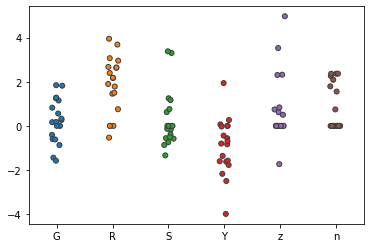

In [8]:
sns.stripplot(data=rFon1D_df, linewidth=1)

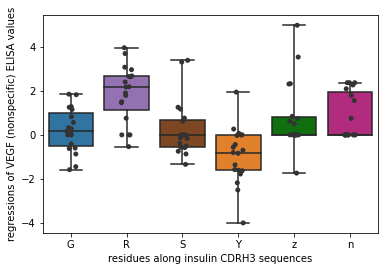

In [39]:
ortho_seqs_colors = {"G": "tab:blue", "R": "tab:purple", "S":"saddlebrown", "Y":"tab:orange", "z":"g", "n":"mediumvioletred"}
ax = sns.boxplot(data=rFon1D_df, whis=np.inf, palette=ortho_seqs_colors)
ax = sns.stripplot(data=rFon1D_df, color=".2")
plt.xlabel('residues along insulin CDRH3 sequences')
plt.ylabel('regressions of VEGF (nonspecific) ELISA values')
plt.savefig('vegf_elisa_insulinseqs_rFon1D_boxplot.png', dpi=600)

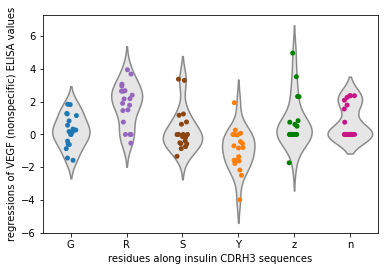

In [40]:
ax = sns.violinplot(data=rFon1D_df, inner=None, color=".9")
ax = sns.stripplot(data=rFon1D_df, palette=ortho_seqs_colors)
plt.xlabel('residues along insulin CDRH3 sequences')
plt.ylabel('regressions of VEGF (nonspecific) ELISA values')
plt.savefig('vegf_elisa_insulinseqs_rFon1D_violinplot.png', dpi=600)

In [42]:
def mann_whitney_u_test(dist1, dist2):
    u_statistic, p_val = mannwhitneyu(dist1,dist2)
    return u_statistic, p_val

In [43]:
mann_whitney_u_test(list(rFon1D_df['R']), list(rFon1D_df['Y']))

(337.0, 5.130676621729409e-06)